<a href="https://colab.research.google.com/github/jaeyoonjeong9024/8-weeks/blob/main/INCEPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# 필요 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv1D, MaxPooling1D, concatenate
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
# (원본) 파일 로드
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# (원본) 파일 그룹 로드
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    loaded = np.dstack(loaded)
    return loaded

# (원본) 데이터셋 그룹 로드 (train 또는 test)
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # 9개 파일명 생성 (acc 3+3, gyro 3)
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # 로드
    X = load_group(filenames, filepath)
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# (원본) 전체 데이터셋 로드
def load_dataset(prefix=''):
    base_path = prefix + '/content/drive/MyDrive/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/'
    trainX, trainy = load_dataset_group('train', base_path)
    testX, testy = load_dataset_group('test', base_path)
    # 레이블 0-5로 조정 및 원-핫 인코딩
    trainy = trainy - 1
    testy = testy - 1
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print("trainX shape:", trainX.shape, " testX shape:", testX.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [25]:
# 데이터 로드
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

# 학습/검증 데이터 분할
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    trainX, trainy_one_hot, test_size=0.2, random_state=100
)

# 모델 파라미터 설정
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = y_train_one_hot.shape[1]

/tmp/ipython-input-4245881589.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-4245881589.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-4245881589.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-4245881589.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


trainX shape: (7352, 128, 9)  testX shape: (2947, 128, 9)


/tmp/ipython-input-4245881589.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


In [26]:
## Level_1
inputs1_1= Input(shape=(n_timesteps,n_features))
conv1_1_btnk = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs1_1) # 💡 (추가) 1x1 병목
conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(conv1_1_btnk) # 💡 (수정) 입력을 btnk로

inputs1_2= Input(shape=(n_timesteps,n_features))
conv1_2_btnk = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs1_2) # 💡 (추가) 1x1 병목
conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(conv1_2_btnk) # 💡 (수정) 입력을 btnk로

inputs1_3= Input(shape=(n_timesteps,n_features))
conv1_3_btnk = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs1_3) # 💡 (추가) 1x1 병목
conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(conv1_3_btnk) # 💡 (수정) 입력을 btnk로

inputs1_4= Input(shape=(n_timesteps,n_features))
conv1_4_btnk = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs1_4) # 💡 (추가) 1x1 병목
conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(conv1_4_btnk) # 💡 (수정) 입력을 btnk로
# merge1
merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)
pool_1=MaxPooling1D(pool_size=5)(merged_1)

## Level_2
conv2_1_btnk = Conv1D(filters=32, kernel_size=1, activation='relu')(pool_1) # 💡 (추가) 1x1 병목
conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv2_1_btnk) # 💡 (수정) 입력을 btnk로

conv2_2_btnk = Conv1D(filters=32, kernel_size=1, activation='relu')(pool_1) # 💡 (추가) 1x1 병목
conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(conv2_2_btnk) # 💡 (수정) 입력을 btnk로

conv2_3_btnk = Conv1D(filters=32, kernel_size=1, activation='relu')(pool_1) # 💡 (추가) 1x1 병목
conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(conv2_3_btnk) # 💡 (수정) 입력을 btnk로

conv2_4_btnk = Conv1D(filters=32, kernel_size=1, activation='relu')(pool_1) # 💡 (추가) 1x1 병목
conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(conv2_4_btnk) # 💡 (수정) 입력을 btnk로
# merge2
merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)
pool_2=MaxPooling1D(pool_size=5)(merged_2)

## Level_3
conv3_1_btnk = Conv1D(filters=16, kernel_size=1, activation='relu')(pool_2) # 💡 (추가) 1x1 병목
conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(conv3_1_btnk) # 💡 (수정) 입력을 btnk로

conv3_2_btnk = Conv1D(filters=16, kernel_size=1, activation='relu')(pool_2) # 💡 (추가) 1x1 병목
conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(conv3_2_btnk) # 💡 (수정) 입력을 btnk로

conv3_3_btnk = Conv1D(filters=16, kernel_size=1, activation='relu')(pool_2) # 💡 (추가) 1x1 병목
conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(conv3_3_btnk) # 💡 (수정) 입력을 btnk로

conv3_4_btnk = Conv1D(filters=16, kernel_size=1, activation='relu')(pool_2) # 💡 (추가) 1x1 병목
conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(conv3_4_btnk) # 💡 (수정) 입력을 btnk로
# merge
merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)
pool_3=MaxPooling1D(pool_size=5)(merged_3)

## (원본과 동일)
flat_cnn=Flatten()(pool_3)
dense = Dense(512, activation='relu')(flat_cnn)
outputs = Dense(n_outputs, activation='softmax')(dense)

## (원본과 동일) 4-입력 구조
inception_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

In [27]:
inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
inception_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 128, 64)   │        640 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 128, 64)   │        640 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, 128, 64)   │        640 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_42 (Conv1D)  │ (None, 128, 64)   │        640 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_37 (Conv1D)  │ (None, 126, 128)  │     24,704 │ conv1d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 124, 128)  │     41,088 │ conv1d_38[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_41 (Conv1D)  │ (None, 122, 128)  │     57,472 │ conv1d_40[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_43 (Conv1D)  │ (None, 120, 128)  │     73,856 │ conv1d_42[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 492, 128)  │          0 │ conv1d_37[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_39[0][0],  │
│                     │                   │            │ conv1d_41[0][0],  │
│                     │                   │            │ conv1d_43[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_6     │ (None, 98, 128)   │          0 │ concatenate_6[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_44 (Conv1D)  │ (None, 98, 32)    │      4,128 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_46 (Conv1D)  │ (None, 98, 32)    │      4,128 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_48 (Conv1D)  │ (None, 98, 32)    │      4,128 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_50 (Conv1D)  │ (None, 98, 32)    │      4,128 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_45 (Conv1D)  │ (None, 96, 64)    │      6,208 │ conv1d_44[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_47 (Conv1D)  │ (None, 94, 64)    │     10,304 │ conv1d_46[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_49 (Conv1D)  │ (None, 92, 64)    │     14,400 │ conv1d_48[0][0] 

 Total params: 1,186,886 (4.53 MB)

 Trainable params: 1,186,886 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
print("Inception-Style (4-Input) 모델 학습 시작...")

model_history = inception_model.fit(
    x=[X_train, X_train, X_train, X_train], # 💡 (원본 방식 유지)
    y=y_train_one_hot,
    epochs=30,
    batch_size=32,
    validation_data=([X_val, X_val, X_val, X_val], y_val_one_hot)
)

print("학습 완료.")

Inception-Style (4-Input) 모델 학습 시작...
Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 50s 229ms/step - accuracy: 0.7122 - loss: 0.6865 - val_accuracy: 0.9477 - val_loss: 0.1508
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 81s 225ms/step - accuracy: 0.9506 - loss: 0.1259 - val_accuracy: 0.9300 - val_loss: 0.1409
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 81s 216ms/step - accuracy: 0.9536 - loss: 0.1153 - val_accuracy: 0.9511 - val_loss: 0.1246
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9568 - loss: 0.1009 - val_accuracy: 0.9531 - val_loss: 0.1075
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 80s 216ms/step - accuracy: 0.9581 - loss: 0.0953 - val_accuracy: 0.9545 - val_loss: 0.0960
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.9574 - loss: 0.1057 - val_accuracy: 0.9524 - val_loss: 0.1127
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.9613 - loss: 0.0904 - val_accuracy: 0.9585 - val_loss: 0.0971
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 2

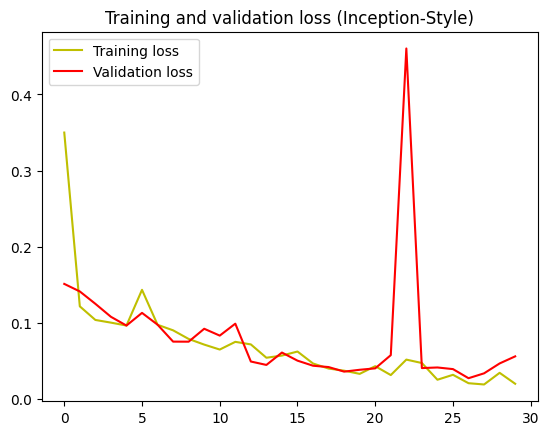

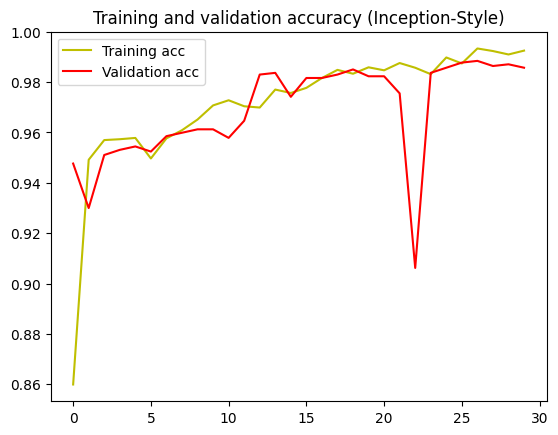

In [29]:
# 손실(Loss) 그래프
plt.plot(model_history.history['loss'], 'y', label='Training loss')
plt.plot(model_history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss (Inception-Style)')
plt.legend()
plt.show()

# 정확도(Accuracy) 그래프
plt.plot(model_history.history['accuracy'], 'y', label='Training acc')
plt.plot(model_history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy (Inception-Style)')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
--- Confusion Matrix ---
[[486   1   9   0   0   0]
 [  2 469   0   0   0   0]
 [  1   0 419   0   0   0]
 [  0   5   0 406  77   3]
 [  0   2   0  30 500   0]
 [  0   0   0   0   0 537]]

--- Accuracy Score ---
0.9558873430607397

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       496
           1       0.98      1.00      0.99       471
           2       0.98      1.00      0.99       420
           3       0.93      0.83      0.88       491
           4       0.87      0.94      0.90       532
           5       0.99      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



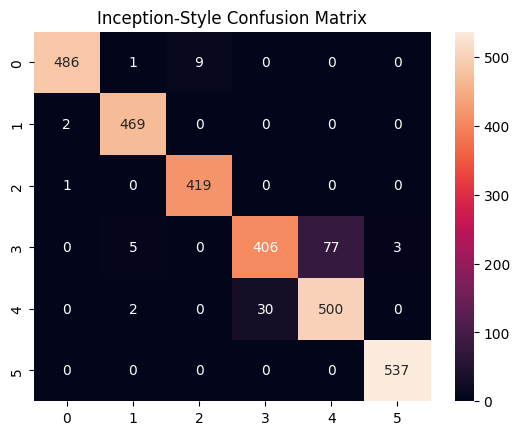

In [30]:
# 예측
pred_inception = inception_model.predict([testX, testX, testX, testX]) # 💡 (원본 방식 유지)
pred_classes = np.argmax(pred_inception, axis=-1)

# 평가
cm = confusion_matrix(testy, pred_classes)
print("--- Confusion Matrix ---")
print(cm)
print("\n--- Accuracy Score ---")
print(accuracy_score(testy, pred_classes))
print("\n--- Classification Report ---")
print(classification_report(testy, pred_classes))

# Heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Inception-Style Confusion Matrix')
plt.show()